<a href="https://colab.research.google.com/github/lwi00/hackathon_siren/blob/main/randomforest_hackaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import re
import string
import matplotlib.pyplot as plt


In [ ]:
# Charger les données
file_path = '/content/Updated_Ideation_Data_with_Binary_Column.csv'
data = pd.read_csv(file_path)


In [ ]:
custom_stop_words = set([
    "alors", "au", "aucuns", "aussi", "autre", "avant", "avec", "avoir", "bon",
    "car", "ce", "cela", "ces", "ceux", "chaque", "ci", "comme", "comment",
    "dans", "des", "du", "dedans", "dehors", "depuis", "devrait", "doit",
    "donc", "dos", "début", "elle", "elles", "en", "encore", "essai", "est",
    "et", "eu", "fait", "faites", "fois", "font", "hors", "ici", "il", "ils",
    "je", "juste", "la", "le", "les", "leur", "là", "ma", "maintenant", "mais",
    "mes", "mine", "moins", "mon", "mot", "ni", "nommés", "notre", "nous",
    "nouveaux", "ou", "où", "par", "parce", "parole", "pas", "personnes",
    "peut", "peu", "plupart", "pour", "pourquoi", "quand", "que", "quel",
    "quelle", "quelles", "quels", "qui", "sa", "sans", "ses", "seulement",
    "si", "sien", "son", "sont", "sous", "soyez", "sujet", "sur", "ta",
    "tandis", "tellement", "tels", "tes", "ton", "tous", "tout", "trop",
    "très", "tu", "valeur", "voie", "voient", "vont", "votre", "vous", "vu",
    "ça", "étaient", "état", "étions", "été", "être", "de", "à", "une", "des",
    "dans", "pour", "avec", "sur", "un"
])

# Fonction de nettoyage
def clean_description(text):
    # Enlever les erreurs de saisie
    if re.search(r"idée numéro", text, re.IGNORECASE):
        return ""

    # Enlever la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Enlever les stop words
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in custom_stop_words]
    return ' '.join(cleaned_words)

# Nettoyer la colonne des descriptions
data['Detailed description of the idea'] = data['Detailed description of the idea'].apply(clean_description)


In [ ]:
# Convertir les descriptions en vecteurs numériques
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Detailed description of the idea'])

In [ ]:
# Définir la variable cible
y = data['is a good idea']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Créer le modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire les résultats sur l'ensemble de test
y_pred = model.predict(X_test)


In [ ]:
# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.55


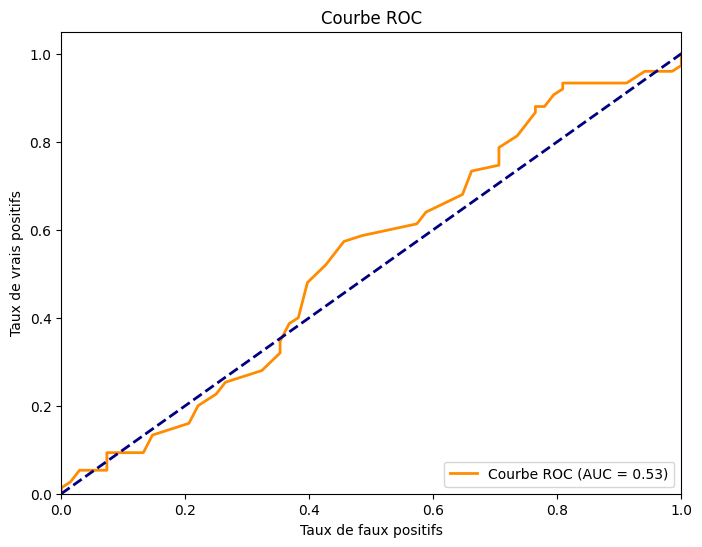

In [ ]:
from sklearn.metrics import roc_curve, auc

# Prédictions de probabilité
y_prob = model.predict_proba(X_test)[:, 1]

# Calcul des courbes ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


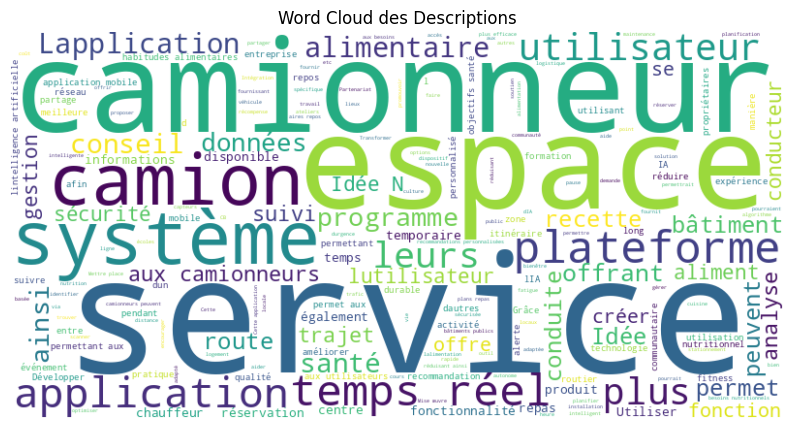

In [ ]:
from wordcloud import WordCloud

# Créer un Word Cloud
text = ' '.join(data['Detailed description of the idea'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le Word Cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud des Descriptions')
plt.show()
